In [275]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns

from matplotlib import pyplot as plt
from hdbscan import HDBSCAN 

In [276]:
### Faster
time_resolution = 30
time_window = 5

In [277]:
df_tech_overlaps = pd.read_csv("../result_csv/tech_overlaps_smoothed"+str(time_resolution+time_window)+".csv")
df_social_overlaps = pd.read_csv("../result_csv/social_overlaps_smoothed"+str(time_resolution+time_window)+".csv")
df_tech_edgesize = pd.read_csv("../result_csv/tech_edgesize_smoothed"+str(time_resolution+time_window)+".csv")
df_social_edgesize = pd.read_csv("../result_csv/social_edgesize_smoothed"+str(time_resolution+time_window)+".csv")

all_graduated = np.load('../all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('../all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

all_graduated = [x.lower() for x in all_graduated if x.lower() in df_tech_overlaps.columns and x.lower() in df_social_overlaps.columns]
all_retired = [x.lower() for x in all_retired if x.lower() in df_tech_overlaps.columns and x.lower() in df_social_overlaps.columns]

In [278]:
df_social_overlaps.columns

Index(['openwebbeans', 'jena', 'etch', 'shindig', 'sanselan', 'rya',
       'skywalking', 'stdcxx', 'wave', 'tajo',
       ...
       'sqoop', 'myfaces', 'nutch', 'muse', 'chemistry', 'reef', 'ofbiz',
       'tapestry', 'subversion', 'kabuki'],
      dtype='object', length=272)

In [279]:
df_tech_vectors = df_tech_edgesize[:24].replace(-1.0,0.0).values.T

In [280]:
df_tech_vectors.shape

(258, 24)

In [281]:
df_social_vectors = df_social_edgesize[:24].replace(-1.0,0.0).values.T

In [282]:
df_social_vectors.shape

(272, 24)

In [283]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_tech = linkage(df_tech_vectors, metric='cityblock')

In [284]:
cluster_tech

array([[2.30000e+01, 2.22000e+02, 5.60000e+01, 2.00000e+00],
       [1.86000e+02, 2.58000e+02, 8.60000e+01, 3.00000e+00],
       [1.42000e+02, 2.48000e+02, 9.70000e+01, 2.00000e+00],
       ...,
       [2.00000e+02, 5.11000e+02, 7.90800e+04, 2.56000e+02],
       [1.63000e+02, 5.12000e+02, 1.59709e+05, 2.57000e+02],
       [1.81000e+02, 5.13000e+02, 1.62556e+05, 2.58000e+02]])

In [285]:
def fancy_dendrogram(*args, **kwargs):
	max_d = kwargs.pop('max_d', None)
	if max_d and 'color_threshold' not in kwargs:
		kwargs['color_threshold'] = max_d
	annotate_above = kwargs.pop('annotate_above', 0)

	ddata = dendrogram(*args, **kwargs)

	if not kwargs.get('no_plot', False):
		plt.title('Hierarchical Clustering Dendrogram (truncated)')
		plt.xlabel('sample index or (cluster size)')
		plt.ylabel('distance')
		for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
			x = 0.5 * sum(i[1:3])
			y = d[1]
			if y > annotate_above:
				plt.plot(x, y, 'o', c=c)
				plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
		if max_d:
			plt.axhline(y=max_d, c='k')
	return ddata

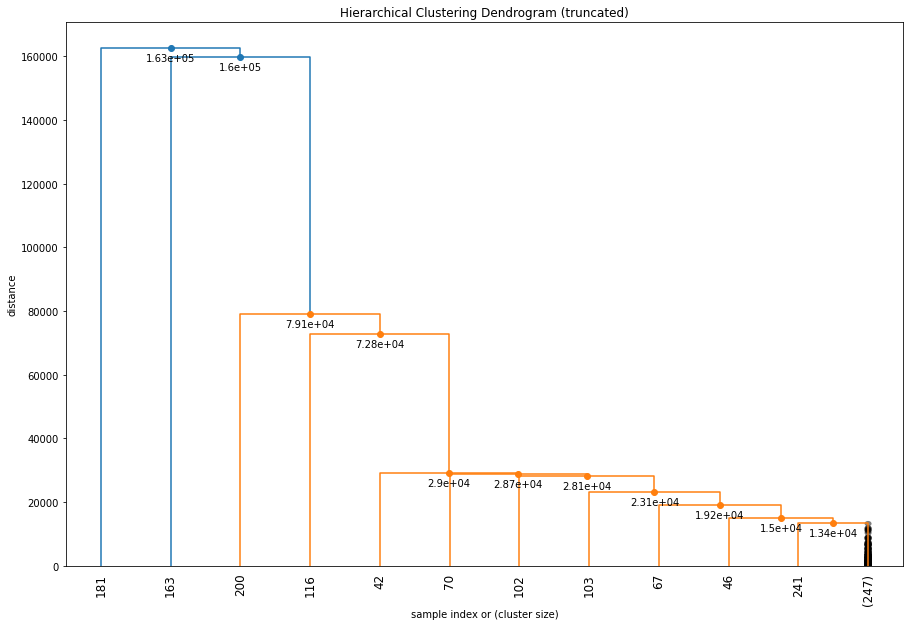

In [286]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
#dendrogram(cluster_tech, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
fancy_dendrogram(cluster_tech, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)
plt.show()

In [287]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_social = linkage(df_social_vectors, metric='cityblock')

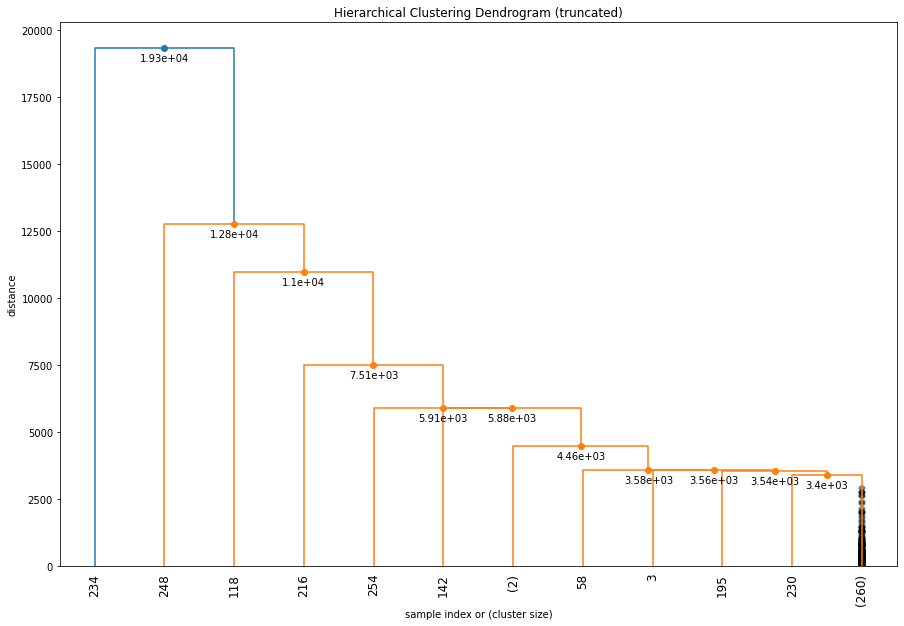

In [288]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
#dendrogram(cluster_social, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
fancy_dendrogram(cluster_social, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)
plt.show()

In [289]:
from scipy.cluster.hierarchy import fcluster
k = 40000
#clusters_result_tech = fcluster(cluster_tech, k, criterion='maxclust')
clusters_result_tech = fcluster(cluster_tech, k, criterion='distance')
print(clusters_result_tech)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [290]:
from scipy.cluster.hierarchy import fcluster
k = 6000
#clusters_result_tech = fcluster(cluster_tech, k, criterion='maxclust')
clusters_result_social = fcluster(cluster_social, k, criterion='distance')
print(clusters_result_social)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [291]:
df_tech_results = pd.DataFrame(np.c_[df_tech_vectors,clusters_result_tech])
df_tech_results.index = df_tech_overlaps.columns
df_tech_results = df_tech_results.rename(columns={24:'cluster'})

In [292]:
df_tech_results

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,cluster
openwebbeans,145,393,199,129,183,188,247,200,259,270,...,0,0,0,0,0,0,0,0,0,1
jena,18,5,17,208,258,288,306,975,648,296,...,0,0,0,0,0,0,0,0,0,1
shindig,133,227,308,243,559,666,811,675,377,348,...,233,190,99,178,133,97,200,0,0,1
sanselan,7,206,101,26,12,9,1,17,91,15,...,0,0,0,0,0,0,0,0,0,1
skywalking,1019,430,1277,1191,456,933,465,2218,470,940,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cayenne,375,144,612,470,390,111,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ofbiz,754,228,1135,213,342,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
zipkin,1,40,41,32,27,1340,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
subversion,505,345,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [293]:
df_tech_plot = pd.DataFrame

In [294]:
df_tech_plot = df_tech_results.groupby('cluster').agg('median')

In [295]:
df_tech_plot

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cluster,,,,,,,,,,,,,,,,,,,,,
1,254.5,163.5,127.5,113.5,108.0,91.0,94.0,76.5,62.0,41.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,914.0,866.0,617.0,789.0,1573.0,1253.0,685.0,1449.0,1303.0,1243.0,...,13863.0,18389.0,5007.0,6303.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,19.0,4.0,1.0,555.0,199.0,37.0,44.0,22367.0,2499.0,...,144.0,248.0,5184.0,12658.0,365.0,5362.0,411.0,833.0,4176.0,1106.0
4,7697.0,56406.0,38182.0,28776.0,12256.0,13393.0,17325.0,37636.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3588.0,6304.0,3479.0,2233.0,10363.0,31391.0,14112.0,3997.0,33113.0,15906.0,...,7720.0,15689.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

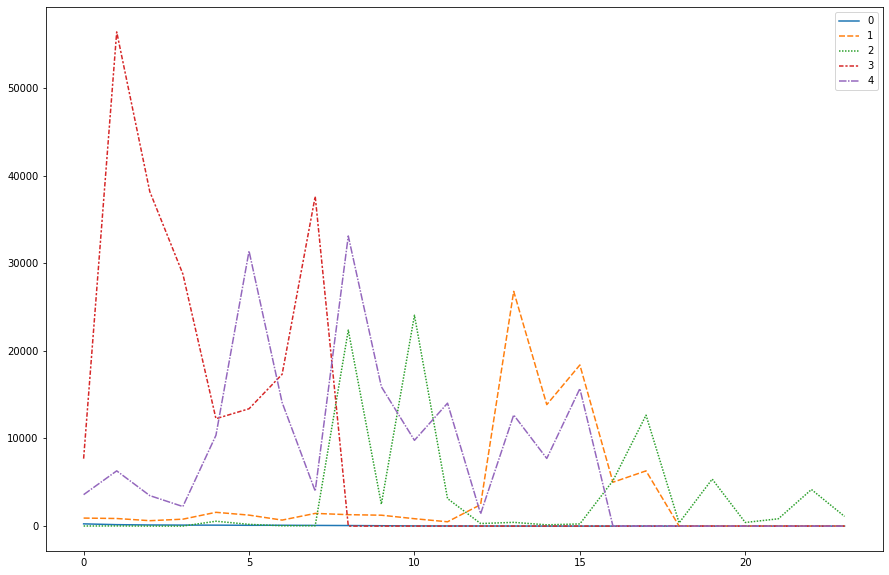

In [296]:
plt.figure(figsize=(15, 10))
sns.lineplot(data= df_tech_plot.values.T)

In [297]:
df_social_results = pd.DataFrame(np.c_[df_social_vectors,clusters_result_social])
df_social_results.index = df_social_overlaps.columns
df_social_results = df_social_results.rename(columns={24:'cluster'})
df_social_plot = df_social_results.groupby('cluster').agg('median')

<AxesSubplot:>

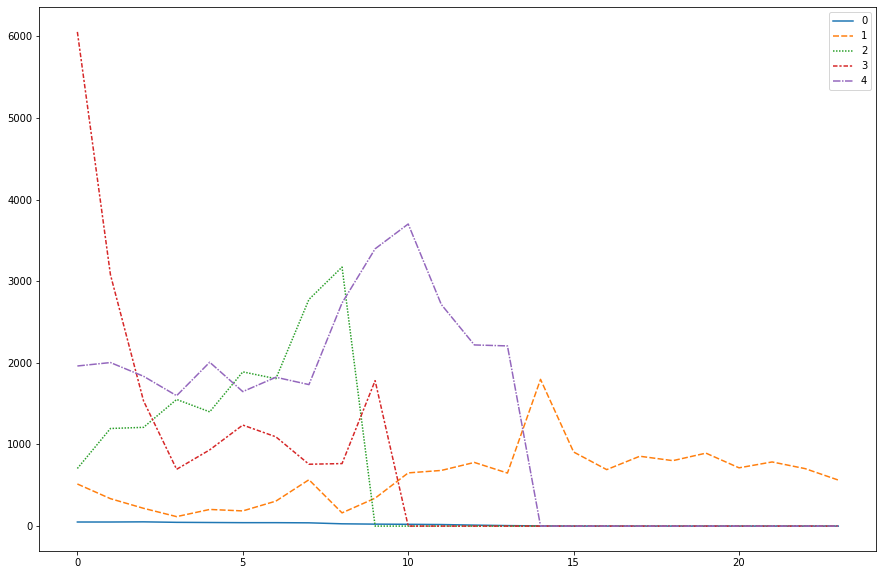

In [298]:
plt.figure(figsize=(15, 10))
sns.lineplot(data= df_social_plot.values.T)

<AxesSubplot:>

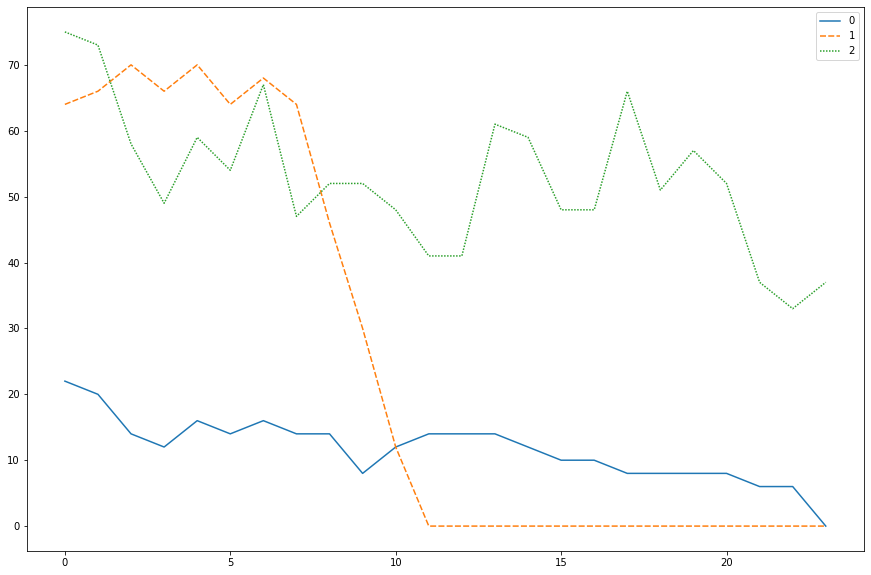

In [299]:
social_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 3).fit(df_social_vectors)
df_hdbscan_results = pd.DataFrame(np.c_[df_social_vectors, social_clusterer.labels_]).groupby(24).agg('median')
plt.figure(figsize=(15, 10))
sns.lineplot(data= df_hdbscan_results.values.T)

In [300]:
pd.value_counts(social_clusterer.labels_)

 0    167
-1     67
 1     38
dtype: int64

<AxesSubplot:ylabel='$\\lambda$ value'>

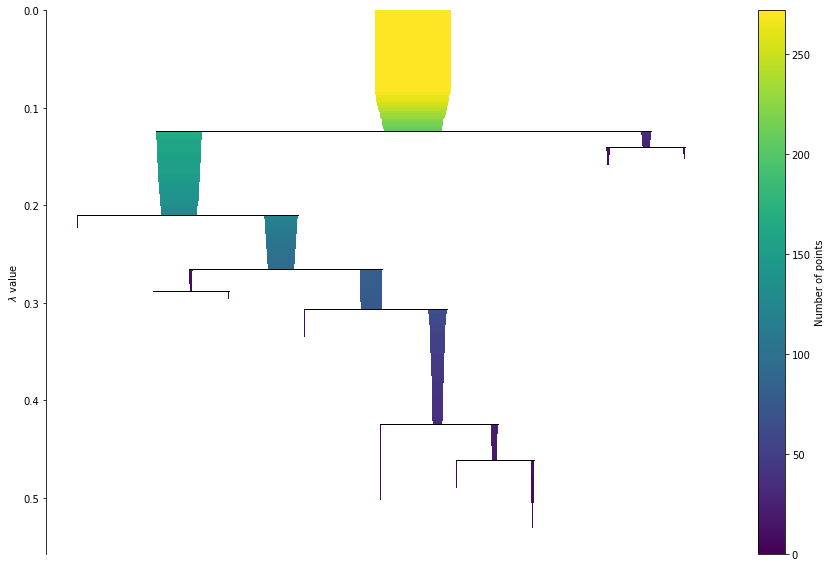

In [301]:
plt.figure(figsize=(15, 10))
social_clusterer.condensed_tree_.plot()

<AxesSubplot:>

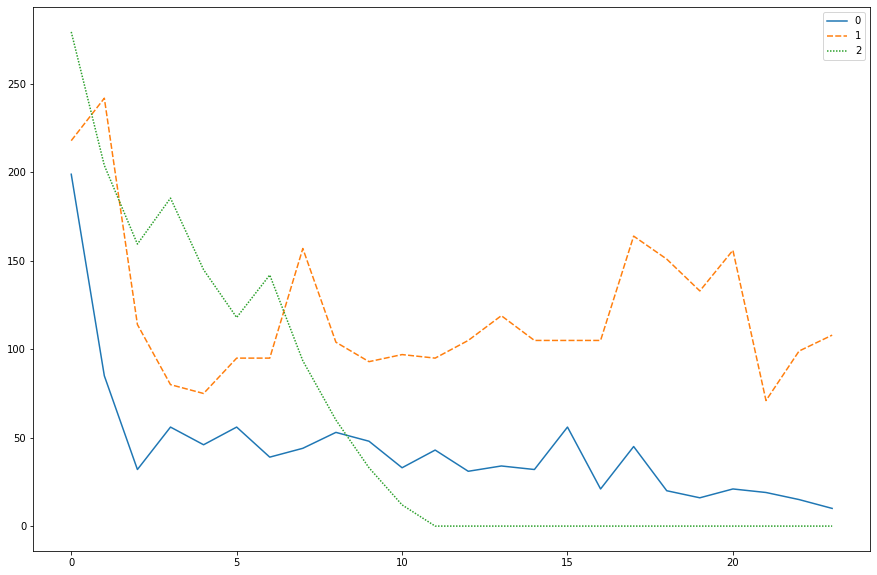

In [302]:
tech_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 3).fit(df_tech_vectors)
tech_hdbscan_results = pd.DataFrame(np.c_[df_tech_vectors, tech_clusterer.labels_]).groupby(24).agg('median')
plt.figure(figsize=(15, 10))
sns.lineplot(data= tech_hdbscan_results.values.T)

In [303]:
pd.value_counts(tech_clusterer.labels_)

 1    180
-1     67
 0     11
dtype: int64

<AxesSubplot:ylabel='$\\lambda$ value'>

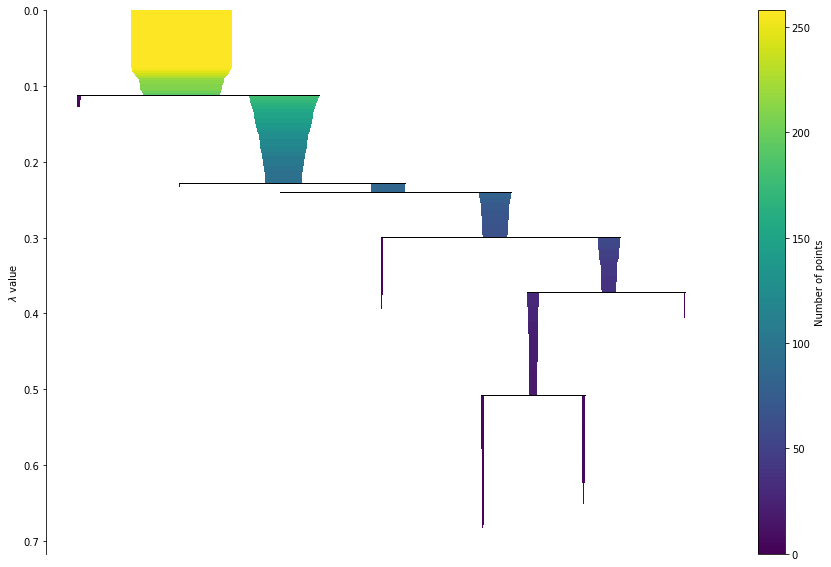

In [304]:
plt.figure(figsize=(15, 10))
tech_clusterer.condensed_tree_.plot()

In [305]:
tech_groups = pd.DataFrame(np.c_[df_tech_vectors, tech_clusterer.labels_]).groupby(24)
social_groups = pd.DataFrame(np.c_[df_social_vectors, social_clusterer.labels_]).groupby(24)

In [306]:
for cluster in tech_groups :
    print(type(cluster))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [307]:
tech_groups.agg('std')

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
24,,,,,,,,,,,,,,,,,,,,,
-1,816.144594,1169.953483,1565.794261,1317.988289,1343.638899,3832.462153,1798.674751,613.134174,4836.706784,2002.215235,...,1039.016913,1938.864008,716.613562,1561.343059,366.502635,687.732821,284.552443,290.072487,649.531859,238.828405
0,770.692935,206.590108,219.278984,41.045872,88.861997,85.612021,78.625002,73.759067,134.036833,72.363100,...,152.692740,82.453734,326.596192,102.160035,188.987734,89.219749,271.548255,141.941793,67.276769,126.991625
1,1210.904526,4314.604575,2904.609853,2213.171877,1228.119607,1188.905664,1619.659703,3114.923555,511.688520,426.513118,...,1055.007683,1402.093139,389.885717,476.562730,82.955740,92.942807,67.631653,74.083223,70.256709,22.501652


In [308]:
social_groups.agg('std')

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
24,,,,,,,,,,,,,,,,,,,,,
-1,244.795479,245.392196,224.597961,195.470477,245.036369,201.642868,224.412451,220.699525,332.567894,414.948193,...,218.857367,112.743342,85.613438,104.884085,98.508405,111.711605,98.577380,97.041417,86.361478,76.003368
0,544.110097,366.660889,363.964923,327.613007,266.933991,222.556496,274.671259,255.870082,293.839958,193.466395,...,132.718280,89.007681,69.164259,76.956877,60.425894,33.566781,17.182353,0.000000,0.000000,0.000000
1,142.939433,109.974729,111.374805,113.802817,114.174781,131.671484,122.461165,146.125854,141.936706,117.569858,...,135.143452,98.215602,126.960977,101.907064,104.325743,84.529137,91.854669,98.484852,112.106838,136.869626


In [309]:
tech_groups.agg('min')

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
24,,,,,,,,,,,,,,,,,,,,,
-1,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
0,9,29,42,49,9,35,36,38,23,30,...,25,29,11,42,14,63,19,34,8,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [310]:
tech_groups.agg('max')

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
24,,,,,,,,,,,,,,,,,,,,,
-1,4185,6304,8731,8894,10363,31391,14112,3997,33113,15906,...,7720,15689,5184,12658,1657,5362,1635,1352,4176,1210
0,2714,569,803,174,249,348,311,284,498,249,...,453,332,1177,314,685,340,874,495,263,374
1,8393,56406,38182,28776,12256,13393,17325,37636,3560,2607,...,13863,18389,5007,6303,779,676,614,791,693,229


In [311]:
social_groups.agg('min')

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
24,,,,,,,,,,,,,,,,,,,,,
-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,20,8,6,0,12,8,12,8,10,...,8,12,8,14,0,0,6,10,0,0


In [312]:
tech_groups.agg('max')

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
24,,,,,,,,,,,,,,,,,,,,,
-1,4185,6304,8731,8894,10363,31391,14112,3997,33113,15906,...,7720,15689,5184,12658,1657,5362,1635,1352,4176,1210
0,2714,569,803,174,249,348,311,284,498,249,...,453,332,1177,314,685,340,874,495,263,374
1,8393,56406,38182,28776,12256,13393,17325,37636,3560,2607,...,13863,18389,5007,6303,779,676,614,791,693,229
